# K-means clustering

## import library

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [38]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


In [39]:
feature.shape

(1000, 2)

## plot the input data

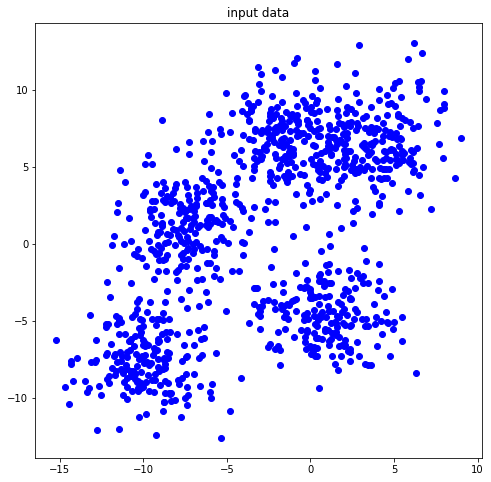

In [40]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
# fill up the blank for plotting the data

num_data1=number_data


plt1_point_0_x=[]
plt1_point_0_y=[]
    
for i in range(num_data1):
    plt1_point_0_x.append(feature[i,0])
    plt1_point_0_y.append(feature[i,1])
        
        
        
    
    
plt.scatter(plt1_point_0_x, plt1_point_0_y, marker='o', color='blue')

    
plt.show()


# ===================================================

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [41]:
arr = np.array([])
arr = np.append(arr, 1)
arr = np.append(arr, 2)
arr

array([1., 2.])

In [42]:
def compute_distance(feature, center):
    # ===================================================
    # fill up the function body
    distance=np.array([])
    for i in range(number_data):  
        arr =((feature[i]-center)**2).sum(axis = 0)
        distance = np.append(distance, arr)
    
    
    
    
    
    
    # ===================================================
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [43]:
def compute_centroid(feature, label_feature, value_label):
    
    # ===================================================
    # fill up the function body
    f_label = value_label
    
    index = np.where(label_feature==f_label)
    f_feature = feature[index]
    if(f_feature.shape[0]==0):
        centroid=0
    else:
        centroid=f_feature.sum(axis=0)/f_feature.shape[0]
    
    # ===================================================
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [44]:
def compute_label(distance):
    # ===================================================
    # fill up the function body
    index_label_feature =np.array(distance.argmin(axis=1))
    
    # ===================================================
    return index_label_feature


In [73]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10#5
number_iteration    = 20
# ===================================================

In [74]:
a= np.array([])
a=np.insert(a,a.shape[0],4)
a
a=np.insert(a,a.shape[0],5)
a


array([4., 5.])

In [75]:
a= np.zeros(shape=(3,3,2))
a[0,1]=np.array([1,2])
a[0,1]

arr = np.array([[3,2,1]])

row_n = arr.shape[0] ##last row
arr = np.insert(arr,row_n,[np.array([1, 2, 3])],axis= 0)
arr = np.insert(arr,row_n,[np.array([1, 2, 3])],axis= 0)
arr
arr[1:,:].T



array([[1, 1],
       [2, 2],
       [3, 3]])

In [76]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.array([])
distance = np.zeros(shape=(1,number_data))

for k in range(number_data):
        # ===================================================
        # fill up the blank
        i = k % number_cluster
        
        label_feature=np.insert(label_feature,label_feature.shape[0],i)
        
        
        
        # ===================================================

for i in range(number_iteration):
    
    loss_=0
    
    distance = np.zeros(shape=(1,number_data))
    
    
    for k in range(number_cluster):
        # ===================================================
        # fill up the blank
        
        center=compute_centroid(feature, label_feature, k)
        centroid_iteration[i,k]=center
        distance_elt=compute_distance(feature, center)
        distance = np.r_[distance,[distance_elt]]
        
        # ===================================================
    
    distance = distance[1:,:].T
    # ===================================================
    # fill up the blank
    label_feature=compute_label(distance)
    
    for k in range(number_cluster):
        
        index = np.where(label_feature==k)
        
        
        loss_ = loss_ + (((feature[index] - centroid_iteration[i,k])**2).sum(axis = 0)).sum(axis = 0)
    
    
    
    loss=loss_/number_data
    loss_iteration[i]=loss
    
    print("[%d] loss = %5.5f" % (i,loss))
    
    # ===================================================
    
    
    

[0] loss = 54.63228
[1] loss = 10.93024
[2] loss = 6.68703
[3] loss = 5.61123
[4] loss = 5.35156
[5] loss = 5.24844
[6] loss = 5.19856
[7] loss = 5.16459
[8] loss = 5.10724
[9] loss = 5.07133
[10] loss = 5.05736
[11] loss = 5.05437
[12] loss = 5.05280
[13] loss = 5.05197
[14] loss = 5.05150
[15] loss = 5.05150
[16] loss = 5.05150
[17] loss = 5.05150
[18] loss = 5.05150
[19] loss = 5.05150


## plot the results

In [77]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    num_data1=number_data


    plt1_point_0_x=[]
    plt1_point_0_y=[]
    
    for i in range(num_data1):
        plt1_point_0_x.append(feature[i,0])
        plt1_point_0_y.append(feature[i,1])
        
        
        
    
    
    plt.scatter(plt1_point_0_x, plt1_point_0_y, marker='o', color='blue')

    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [78]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    plt.plot(list(range(number_iteration)), list(loss_iteration), color = 'red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [79]:
centroid_iteration.shape

(20, 10, 2)

In [80]:
centroid_iteration[:,0,:]

array([[-2.5813262 , -0.06506697],
       [ 2.19760287, -3.70067226],
       [ 1.44733883, -4.93697194],
       [ 1.23834428, -5.13276089],
       [ 1.45709089, -5.29383606],
       [ 1.66349968, -5.38948184],
       [ 1.86218009, -5.46262635],
       [ 1.94603149, -5.51315976],
       [ 1.99502555, -5.54276449],
       [ 2.07028043, -5.5592468 ],
       [ 2.0935077 , -5.55110127],
       [ 2.0935077 , -5.55110127],
       [ 2.0935077 , -5.55110127],
       [ 2.08798038, -5.57696279],
       [ 2.08791903, -5.60287131],
       [ 2.08791903, -5.60287131],
       [ 2.08791903, -5.60287131],
       [ 2.08791903, -5.60287131],
       [ 2.08791903, -5.60287131],
       [ 2.08791903, -5.60287131]])

In [81]:
if (number_cluster == 5):

    x1 = centroid_iteration[:,0,0]
    y1 = centroid_iteration[:,0,1]
    x2 = centroid_iteration[:,1,0]
    y2 = centroid_iteration[:,1,1]
    x3 = centroid_iteration[:,2,0]
    y3 = centroid_iteration[:,2,1]
    x4 = centroid_iteration[:,3,0]
    y4 = centroid_iteration[:,3,1]
    x5 = centroid_iteration[:,4,0]
    y5 = centroid_iteration[:,4,1]
    
    init_x = [x1[0],x2[0],x3[0],x4[0],x5[0]] 
    init_y = [y1[0],y2[0],y3[0],y4[0],y5[0]]
    final_x=[x1[-1],x2[-1],x3[-1],x4[-1],x5[-1]] 
    final_y=[y1[-1],y2[-1],y3[-1],y4[-1],y5[-1]] 
    
    
if (number_cluster == 10):

    x1 = centroid_iteration[:,0,0]
    y1 = centroid_iteration[:,0,1]
    x2 = centroid_iteration[:,1,0]
    y2 = centroid_iteration[:,1,1]
    x3 = centroid_iteration[:,2,0]
    y3 = centroid_iteration[:,2,1]
    x4 = centroid_iteration[:,3,0]
    y4 = centroid_iteration[:,3,1]
    x5 = centroid_iteration[:,4,0]
    y5 = centroid_iteration[:,4,1]
    x6 = centroid_iteration[:,5,0]
    y6 = centroid_iteration[:,5,1]
    x7 = centroid_iteration[:,6,0]
    y7 = centroid_iteration[:,6,1]
    x8 = centroid_iteration[:,7,0]
    y8 = centroid_iteration[:,7,1]
    x9 = centroid_iteration[:,8,0]
    y9 = centroid_iteration[:,8,1]
    x10 = centroid_iteration[:,9,0]
    y10 = centroid_iteration[:,9,1]
    
    init_x = [x1[0],x2[0],x3[0],x4[0],x5[0],x6[0],x7[0],x8[0],x9[0],x10[0]] 
    init_y = [y1[0],y2[0],y3[0],y4[0],y5[0],y6[0],y7[0],y8[0],y9[0],y10[0]]
    final_x=[x1[-1],x2[-1],x3[-1],x4[-1],x5[-1],x6[-1],x7[-1],x8[-1],x9[-1],x10[-1]] 
    final_y=[y1[-1],y2[-1],y3[-1],y4[-1],y5[-1],y6[-1],y7[-1],y8[-1],y9[-1],y10[-1]]



In [82]:
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8)) 
    plt.title('centroid')
    
    if (number_cluster == 5):
        plt.plot(list(x1),list(y1),color = 'red',label='cluster=0')
        plt.plot(list(x2),list(y2),color = 'green',label='cluster=1')
        plt.plot(list(x3),list(y3),color = 'blue',label='cluster=2')
        plt.plot(list(x4),list(y4),color = 'y',label='cluster=3')
        plt.plot(list(x5),list(y5),color = 'm',label='cluster=4')
        plt.scatter(init_x,init_y,marker='o', color='blue',label='initial')
        plt.scatter(final_x,final_y,marker = 's',color = 'red',label = 'final')
        
        
    
    if (number_cluster == 10):
        plt.plot(list(x1),list(y1),color = 'red',label='cluster=0')
        plt.plot(list(x2),list(y2),color = 'green',label='cluster=1')
        plt.plot(list(x3),list(y3),color = 'blue',label='cluster=2')
        plt.plot(list(x4),list(y4),color = 'y',label='cluster=3')
        plt.plot(list(x5),list(y5),color = 'm',label='cluster=4')
        plt.plot(list(x6),list(y6),color = 'c',label='cluster=5')
        plt.plot(list(x7),list(y7),color = 'k',label='cluster=6')
        plt.plot(list(x8),list(y8),color = 'gray',label='cluster=7')
        plt.plot(list(x9),list(y9),color = 'olive',label='cluster=8')
        plt.plot(list(x10),list(y10),color = 'peru',label='cluster=9')
        plt.scatter(init_x,init_y,marker='o', color='blue',label='initial')
        plt.scatter(final_x,final_y,marker = 's',color = 'red',label = 'final')
    
    
    
                     
    
    
               
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [83]:
label_cluster = label_feature 

In [84]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank

    X = feature[:,0]
    Y = feature[:,1]
    C = label_feature
    
   
    plt.scatter(X, Y, c=C, cmap=plt.cm.get_cmap('rainbow', number_cluster))
    plt.colorbar(label='color')
    plt.show()
    
    
    
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

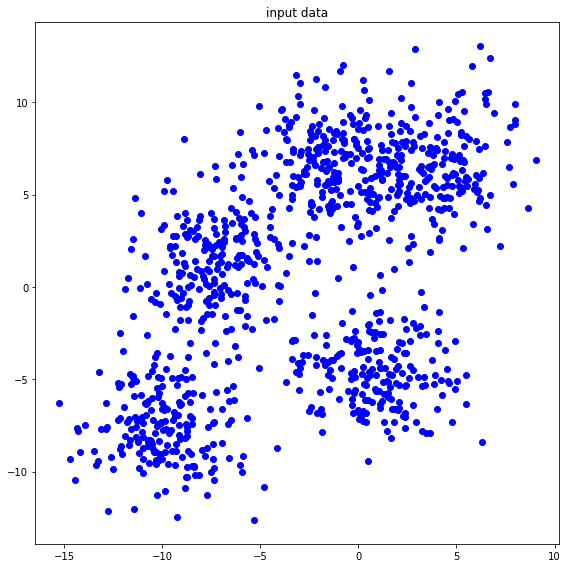

In [69]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

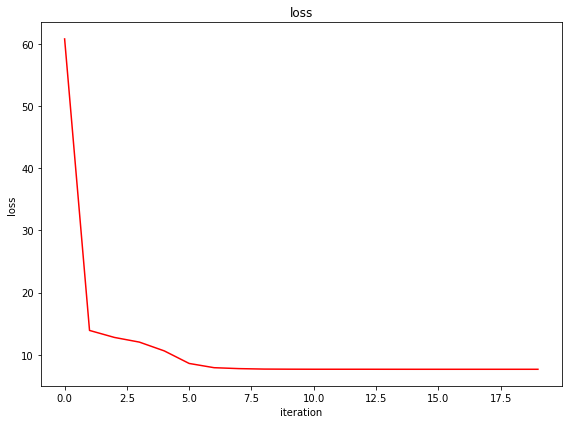

In [70]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

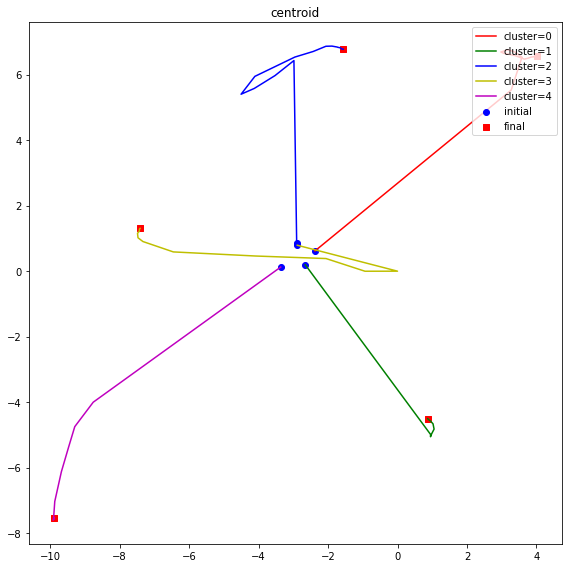

In [71]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

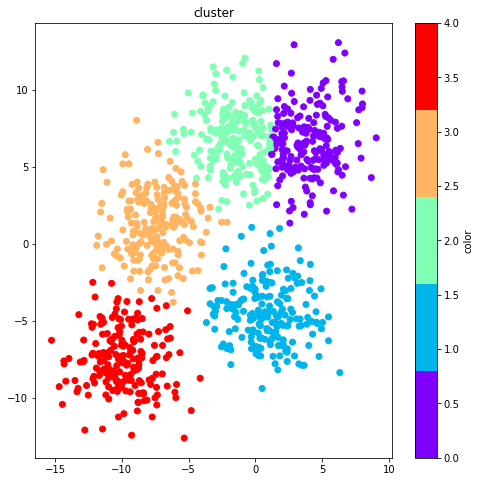

<Figure size 432x288 with 0 Axes>

In [72]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

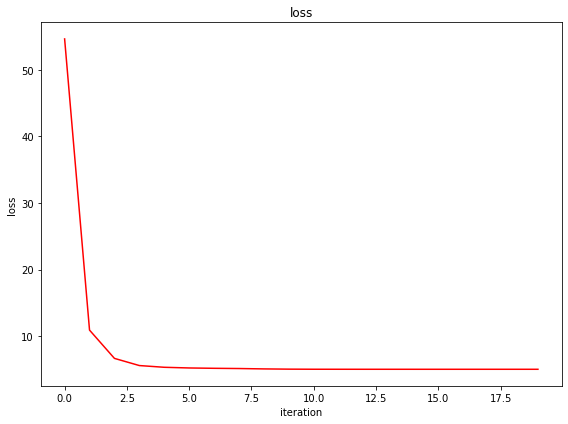

In [85]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

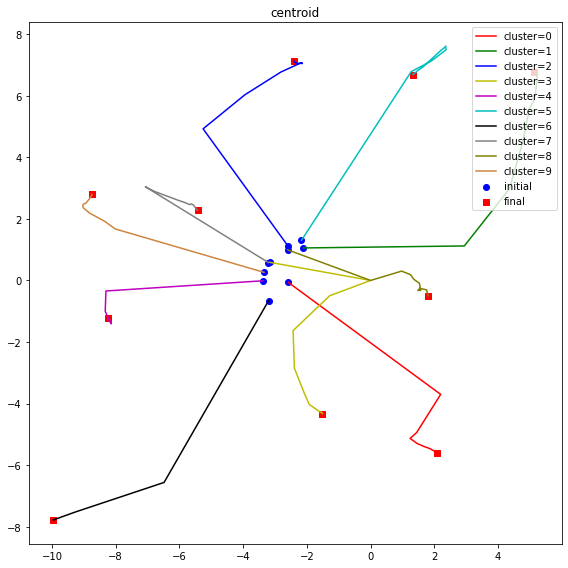

In [86]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

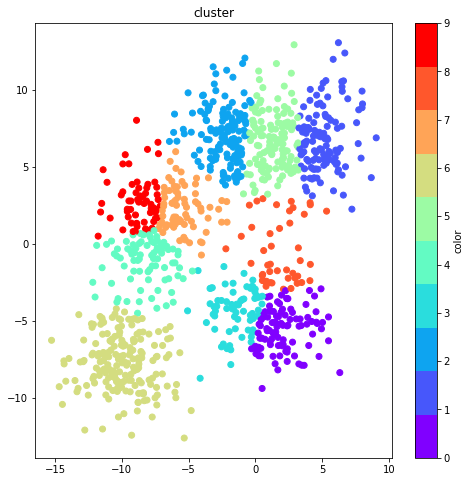

<Figure size 432x288 with 0 Axes>

In [87]:
plot_cluster(feature, label_feature, label_cluster)

***